# Challenge 1

## SciPy Tutorial
Pertinent information about [SciPy](https://docs.scipy.org/) and NumPy is available in the [SciPy Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html).
 * Read [Introduction](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)
 * Read [Basic functions](https://docs.scipy.org/doc/scipy/reference/tutorial/basic.html)
 * Read [Optimization](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
 
Consider the function defined below.
 * Plot the function using [matplotlib](https://matplotlib.org/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize

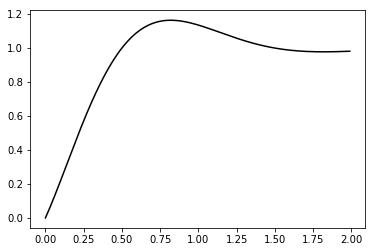

In [2]:
def g(t):
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t))

t1 = np.arange(0.0, 2.0, 0.01)

plt.figure(1)
plt.plot(t1, g(t1), 'k')
plt.show()

Consider the class of functions of the form $f(t) = 1 - e^{-at}$ where $a$ is a free parameter.
 * Find the value of $a$ that minimizes the $L_2$ norm between $g(t)$ and $f(t)$ over the interval $[0, 2]$
 * Computer the residual mean squared error
 * Explain how you obtained $a$

the value of a is 4.603448
Graph of g(x) and f(x) is as follows


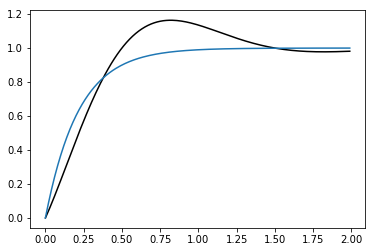

Graph of integrationFun(a) is as follows


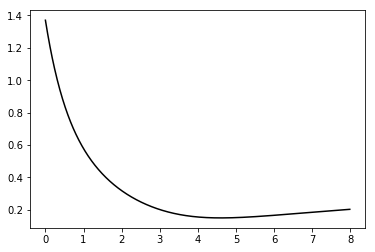

In [3]:
def f(t, a):
    return 1-np.exp(-a*t)

def res(t, a):
    return (f(t,a)-g(t))**2

def integrationFun(a):
    y, err = np.sqrt(quad(res, 0, 2, args=(a,)))
    return y

x0 = 11
ans =  minimize(integrationFun, x0)
print("the value of a is %f"%ans.x[0])

print("Graph of g(x) and f(x) is as follows")
plt.figure(2)
plt.plot(t1, g(t1), 'k')
plt.plot(t1, f(t1, ans.x))
plt.show()

print("Graph of integrationFun(a) is as follows")
plt.figure(3)
a1 = np.arange(0.0, 8.0, 0.01)
b1 = np.empty_like(a1)
for num in range(len(a1)):
    b1[num] = integrationFun(a1[num])
plt.plot(a1, b1, 'k')
plt.show()

In [4]:
print((integrationFun(ans.x)**2)/2) #this is the residual mean squared error

0.0113190214048


Solution
* the value of $a$ that minimizes the $L_2$ norm is 4.603
* the residual mean squared error is $\frac {L_2^2}{n}$, so it is 0.0113
* To obtain $a$, first we need to construct $$res(t,a)=(f(t,a)-g(t))^2$$then we use quad in scipy to calculate its integration in $[0,2]$. Finally, we use the minimize function in scipy to calculate its min point in terms of $a$.